In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_excel('Training.xlsx')
test_df = pd.read_excel('Test_Truncated.xlsx')


In [3]:
print(train_df.shape)
print(train_df.columns)
train_df.head()


(39345, 68)
Index(['Match ID 18Char', 'Completion Date', 'Match Support Contact Notes',
       'Stage', 'Little ID', 'Big ID', 'Big County', 'Big Age',
       'Big Occupation', 'Big: Military', 'Big Approved Date',
       'Big Level of Education', 'Big Languages', 'Big Gender',
       'Big Birthdate', 'Big Employer', 'Program', 'Program Type',
       'Big Race/Ethnicity', 'Closure Reason', 'Closure Details',
       'Match Activation Date', 'Match Closure Meeting Date',
       'Rationale for Match', 'Big Enrollment: Record Type',
       'Big Assessment Uploaded', 'Big Acceptance Date', 'Big Car Access',
       'Big Days Acceptance to Match', 'Big Days Interview to Acceptance',
       'Big Days Interview to Match', 'Big Open to Cross-Gender Match',
       'Big Re-Enroll', 'Big Contact: Preferred Communication Type',
       'Big Contact: Former Big/Little',
       'Big Contact: Interest Finder - Sports',
       'Big Contact: Interest Finder - Places To Go',
       'Big Contact: Interest F

,Match ID 18Char,Completion Date,Match Support Contact Notes,Stage,Little ID,Big ID,Big County,Big Age,Big Occupation,Big: Military,...,Little Contact: Interest Finder - Career,Little Contact: Interest Finder - Personality,Little Contact: Interest Finder - Three Wishes,Little Gender,Little Participant: Race/Ethnicity,Little Birthdate,Little Mailing Address Census Block Group,Big Home Census Block Group,Big Employer/School Census Block Group,Match Length
0,a1v2J0000028pRvQAI,2017-11-30,Question: Activities: Answer: See ms...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
1,a1v2J0000028pRvQAI,2017-10-31,Question: Activities: Answer: See MS...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
2,a1v2J0000028pRvQAI,2017-12-01,Question: Activities: Answer: Match ...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
3,a1v2J0000028pRvQAI,2017-05-29,Question: Activities: Answer: Msc as...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
4,a1v2J0000028pRvQAI,2017-04-30,Question: Activities: Answer: Msc as...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0


In [13]:
from autogluon.tabular import TabularPredictor

# Define label column
label = 'Match Length'  # Make sure this column exists in your training set

predictor = TabularPredictor(
    label="Match Length",
    eval_metric="rmse"
).fit(
    train_data=train_df,
    ag_args_fit={"ag.max_memory_usage_ratio": 1.5},  # You can increase this to 2.0 if needed
    time_limit=600,
    presets="best"
)



No path specified. Models will be saved in: "AutogluonModels\ag-20250324_050541"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.5
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          20
Memory Avail:       1.56 GB / 15.57 GB (10.0%)
Disk Space Avail:   714.02 GB / 931.72 GB (76.6%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon wi

In [ ]:
#After running the code above it will show where to pull
predictor = TabularPredictor.load("AutogluonModels/ag-20250324_050541")

# test_df = pd.read_excel("Test_Truncated.xlsx")
# test_df.columns = test_df.columns.str.strip()  # optional cleanup


In [16]:
missing_cols = ['Stage', 'Closure Reason', 'Closure Details', 'Match Closure Meeting Date']
for col in missing_cols:
    if col not in test_df.columns:
        test_df[col] = None 

In [17]:
predictions = predictor.predict(test_df)


In [18]:
output = test_df[['Match ID 18Char']].copy()
output['Predicted Match Length'] = predictions


In [19]:
output.to_csv("predicted_match_lengths.csv", index=False)
print("✅ Predictions saved to 'predicted_match_lengthsall.csv'")

✅ Predictions saved to 'predicted_match_lengthsall.csv'


In [20]:
leaderboard = predictor.leaderboard(silent=True, extra_info=True)

# Show leaderboard
leaderboard.head()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-0.686074,root_mean_squared_error,6.708128,300.234455,0.001001,0.050025,3,True,6,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L2, LightGBMXT_BAG_L1]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 25},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L2, LightGBMXT_BAG_L1, LightGB...",[]
1,LightGBMXT_BAG_L2,-0.701069,root_mean_squared_error,6.707128,300.184429,2.581124,80.675786,2,True,4,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[__nlp__.sports, __nlp__.to stay, __nlp__.you ...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 743},"{'max_memory_usage_ratio': 1.5, 'max_time_limi...","[LightGBMXT_BAG_L1, LightGBM_BAG_L1]",[WeightedEnsemble_L3]
2,LightGBMXT_BAG_L1,-0.778411,root_mean_squared_error,3.260735,196.195236,3.260735,196.195236,1,True,1,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[__nlp__.sports, __nlp__.to stay, __nlp__.you ...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 1735},"{'max_memory_usage_ratio': 1.5, 'max_time_limi...",[],"[WeightedEnsemble_L3, WeightedEnsemble_L2, Lig..."
3,WeightedEnsemble_L2,-0.778411,root_mean_squared_error,3.263247,196.268756,0.002512,0.073520,2,True,3,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[LightGBMXT_BAG_L1],None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 3},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[LightGBMXT_BAG_L1],[]
4,LightGBM_BAG_L2,-22.219741,root_mean_squared_error,5.043234,234.871780,0.917230,15.363136,2,True,5,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[__nlp__.sports, __nlp__.to stay, __nlp__.you ...",None,{'learning_rate': 0.05},{'num_boost_round': 1},"{'max_memory_usage_ratio': 1.5, 'max_time_limi...","[LightGBMXT_BAG_L1, LightGBM_BAG_L1]",[]


C:\Users\Dennis Campoverde-Le\AppData\Local\Temp\ipykernel_25472\3193196360.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Absolute Error", data=errors_df, showfliers=False, palette="pastel")


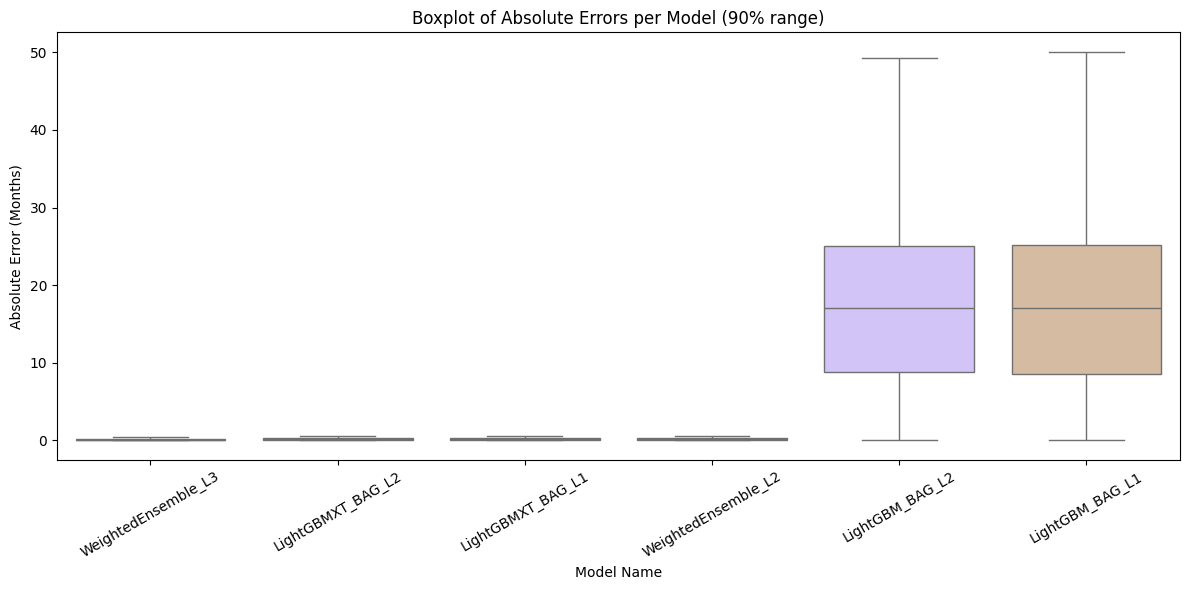

In [21]:
errors = []
for model in leaderboard['model']:
    preds = predictor.predict(train_df.drop(columns=["Match Length"]), model=model)
    err = abs(preds - train_df["Match Length"])
    df_err = pd.DataFrame({
        "Model": model,
        "Absolute Error": err
    })
    errors.append(df_err)

errors_df = pd.concat(errors)
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Absolute Error", data=errors_df, showfliers=False, palette="pastel")
plt.xticks(rotation=30)
plt.title("Boxplot of Absolute Errors per Model (90% range)")
plt.ylabel("Absolute Error (Months)")
plt.xlabel("Model Name")
plt.tight_layout()
plt.show()

# # === Feature importance for best model ===
# best_model = leaderboard.iloc[0]["model"]
# importance_df = predictor.feature_importance(train_df)["importance"].sort_values(ascending=False).head(10)

# plt.figure(figsize=(10, 6))
# importance_df.plot(kind='bar', color='skyblue')
# plt.title("Top 10 Feature Importances in Best Model")
# plt.ylabel("Importance Score")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # === Predictor relationships with target ===
# top_predictors = importance_df.index[:2]

# for col in top_predictors:
#     plt.figure(figsize=(8, 5))
#     sns.scatterplot(data=train_df, x=col, y="Match Length", alpha=0.4)
#     plt.title(f"{col} vs Match Length")
#     plt.ylabel("Match Length (Months)")
#     plt.xlabel(col)
#     plt.tight_layout()
#     plt.show()